<a href="https://colab.research.google.com/github/PedroC-dev/RelatorioAtividadesPDI/blob/main/fundamentos_ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

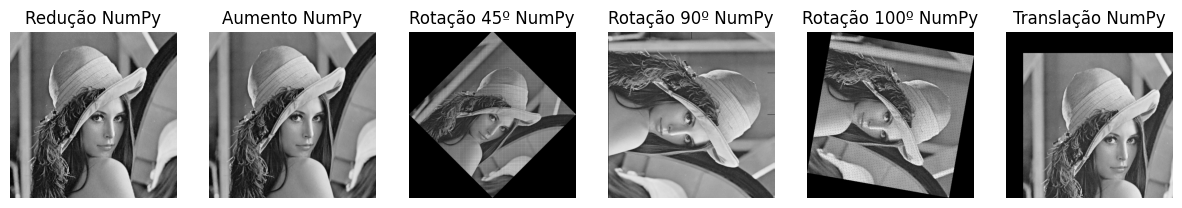

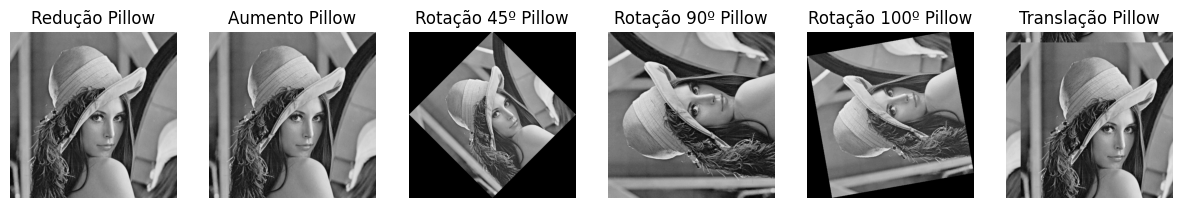

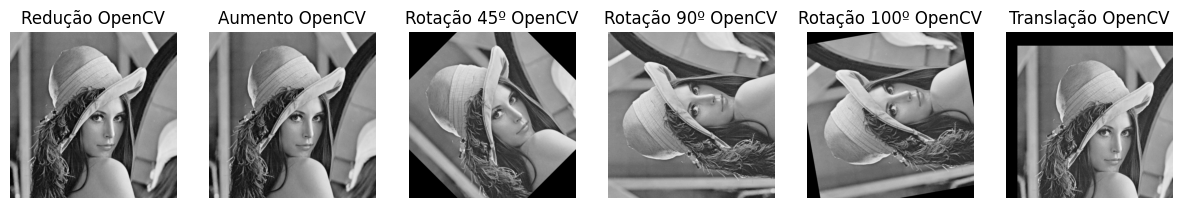

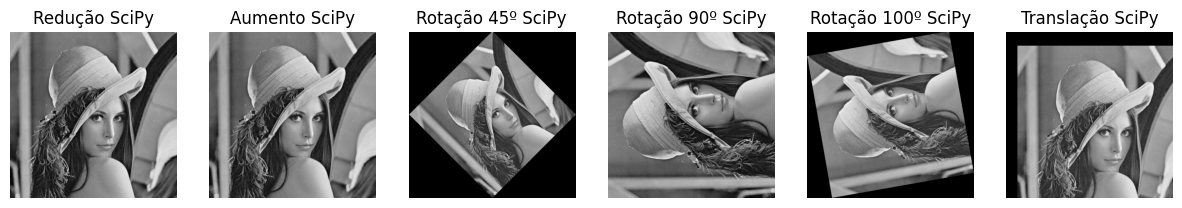

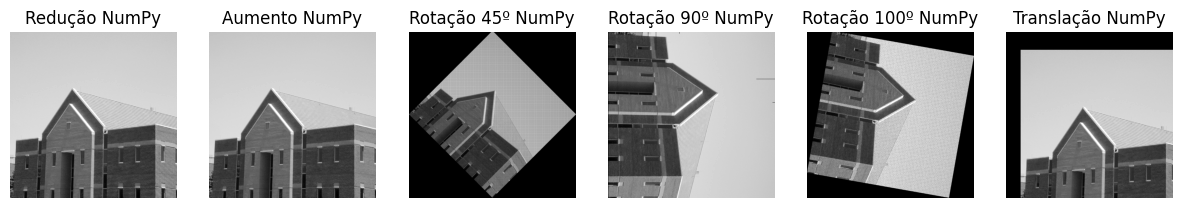

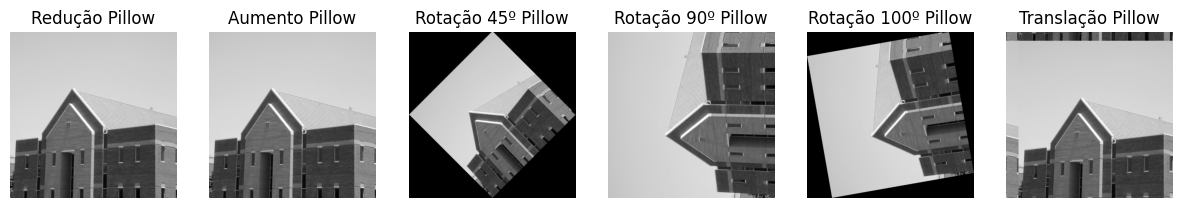

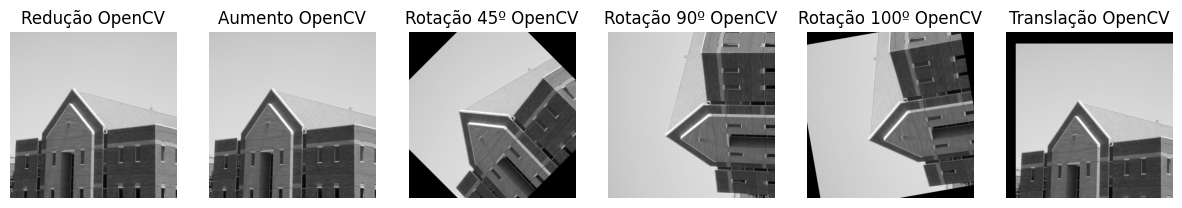

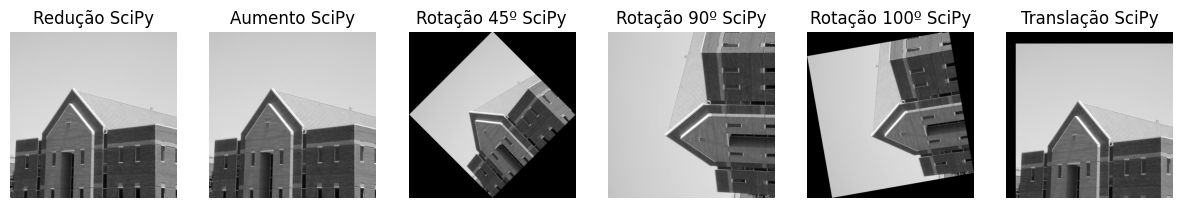

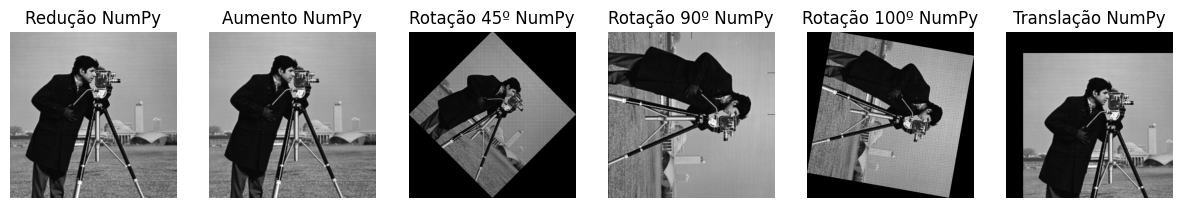

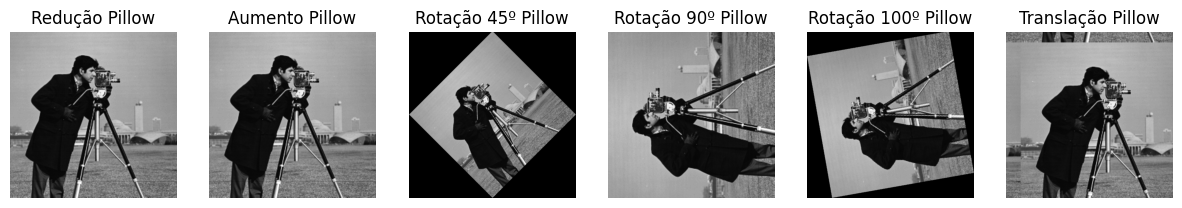

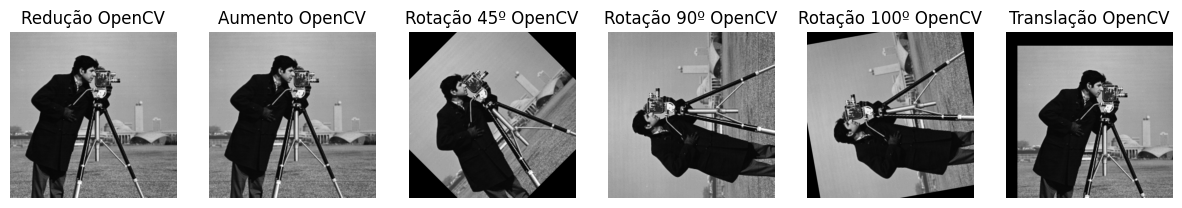

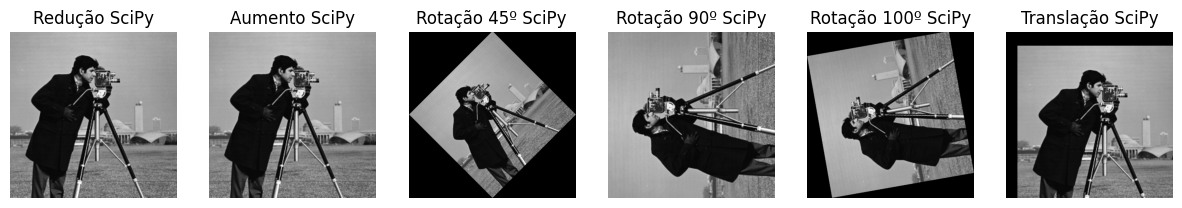

In [ ]:
import numpy as np
from PIL import Image
import cv2
from scipy import ndimage
import matplotlib.pyplot as plt

def carregar_imagem(caminho):
    return Image.open(caminho).convert('L')

# Função para exibir resultados
def exibir_resultados(imagens, titulos):
    fig, ax = plt.subplots(1, len(imagens), figsize=(15, 5))
    for i in range(len(imagens)):
        ax[i].imshow(imagens[i], cmap='gray')
        ax[i].set_title(titulos[i])
        ax[i].axis('off')
    plt.show()

def transformar_imagem(img, fator_escala, dx, dy):
    img = np.array(img)
    # Escala
    h, w = img.shape
    nova_h = int(h * fator_escala)
    nova_w = int(w * fator_escala)

    # Criar nova imagem com a nova dimensão
    img_escalada = np.zeros((nova_h, nova_w), dtype=img.dtype)

    # Preencher a nova imagem com os pixels da imagem original
    for i in range(nova_h):
        for j in range(nova_w):
            orig_x = int(j / fator_escala)
            orig_y = int(i / fator_escala)
            if orig_x < w and orig_y < h:
                img_escalada[i, j] = img[orig_y, orig_x]

def transformar_imagem(img, dx, dy):
    # Fatores de escala
    fator_reducao = 1 / 1.5
    fator_aumento = 2.5
    img = np.array(img)
    # Escala: Redução
    h, w = img.shape
    nova_h_reducao = int(h * fator_reducao)
    nova_w_reducao = int(w * fator_reducao)

    # Criar nova imagem com a nova dimensão (redução)
    img_reduzida = np.zeros((nova_h_reducao, nova_w_reducao), dtype=img.dtype)
    for i in range(nova_h_reducao):
        for j in range(nova_w_reducao):
            orig_x = int(j / fator_reducao)
            orig_y = int(i / fator_reducao)
            if orig_x < w and orig_y < h:
                img_reduzida[i, j] = img[orig_y, orig_x]

    # Escala: Aumento
    nova_h_aumento = int(h * fator_aumento)
    nova_w_aumento = int(w * fator_aumento)

    # Criar nova imagem com a nova dimensão (aumento)
    img_aumentada = np.zeros((nova_h_aumento, nova_w_aumento), dtype=img.dtype)
    for i in range(nova_h_aumento):
        for j in range(nova_w_aumento):
            orig_x = int(j / fator_aumento)
            orig_y = int(i / fator_aumento)
            if orig_x < w and orig_y < h:
                img_aumentada[i, j] = img[orig_y, orig_x]

    # Translação
    h_reduzida, w_reduzida= img_reduzida.shape
    img_translacionada = np.zeros_like(img_reduzida)

    for i in range(h_reduzida):
        for j in range(w_reduzida):
            nova_x = j + dx
            nova_y = i + dy
            if 0 <= nova_x < w_reduzida and 0 <= nova_y < h_reduzida:
                img_translacionada[nova_y, nova_x] = img_reduzida[i, j]

    # Rotação
    def rotacionar(img, angulo):
        angulo_rad = np.deg2rad(angulo)
        h_rot, w_rot = img.shape

        # Calcular novas dimensões
        nova_h_rot = int(abs(h_rot * np.cos(angulo_rad)) + abs(w_rot * np.sin(angulo_rad)))
        nova_w_rot = int(abs(w_rot * np.cos(angulo_rad)) + abs(h_rot * np.sin(angulo_rad)))

        img_rotacionada = np.zeros((nova_h_rot, nova_w_rot), dtype=img.dtype)

        # Calcular o centro da imagem
        cx, cy = w_rot // 2, h_rot // 2
        new_cx, new_cy = nova_w_rot // 2, nova_h_rot // 2

        for i in range(h_rot):
            for j in range(w_rot):
                # Coordenadas do pixel após a rotação
                new_x = int((j - cx) * np.cos(angulo_rad) - (i - cy) * np.sin(angulo_rad) + new_cx)
                new_y = int((j - cx) * np.sin(angulo_rad) + (i - cy) * np.cos(angulo_rad) + new_cy)
                if 0 <= new_x < nova_w_rot and 0 <= new_y < nova_h_rot:
                    img_rotacionada[new_y, new_x] = img[i, j]

        return img_rotacionada

    # Aplicar rotação
    img_rotacionada_45 = rotacionar(img, 45)
    img_rotacionada_90 = rotacionar(img, 90)
    img_rotacionada_100 = rotacionar(img, 100)

    return img_reduzida, img_aumentada, img_rotacionada_45, img_rotacionada_90, img_rotacionada_100, img_translacionada

# Transformações usando Pillow
def transformar_pillow(img):
    # Escala
    reducao = img.resize((int(img.width/1.5), int(img.height/1.5)))
    aumento = img.resize((int(img.width*2.5), int(img.height*2.5)))

    # Rotação
    rotacao_45 = img.rotate(45, expand=True)
    rotacao_90 = img.rotate(90, expand=True)
    rotacao_100 = img.rotate(100, expand=True)

    # Translação
    translacao = Image.fromarray(np.roll(np.array(img), shift=(35, 45), axis=(0, 1)))

    return reducao, aumento, rotacao_45, rotacao_90, rotacao_100, translacao

# Transformações usando OpenCV
def transformar_opencv(img):
    img_cv = np.array(img)

    # Escala
    reducao = cv2.resize(img_cv, (0, 0), fx=1/1.5, fy=1/1.5)
    aumento = cv2.resize(img_cv, (0, 0), fx=2.5, fy=2.5)

    # Rotação
    centro = (img_cv.shape[1]//2, img_cv.shape[0]//2)
    matriz_rotacao_45 = cv2.getRotationMatrix2D(centro, 45, 1)
    matriz_rotacao_90 = cv2.getRotationMatrix2D(centro, 90, 1)
    matriz_rotacao_100 = cv2.getRotationMatrix2D(centro, 100, 1)
    rotacao_45 = cv2.warpAffine(img_cv, matriz_rotacao_45, (img_cv.shape[1], img_cv.shape[0]))
    rotacao_90 = cv2.warpAffine(img_cv, matriz_rotacao_90, (img_cv.shape[1], img_cv.shape[0]))
    rotacao_100 = cv2.warpAffine(img_cv, matriz_rotacao_100, (img_cv.shape[1], img_cv.shape[0]))

    # Translação
    translacao = np.float32([[1, 0, 35], [0, 1, 45]])
    translacionada = cv2.warpAffine(img_cv, translacao, (img_cv.shape[1], img_cv.shape[0]))

    return reducao, aumento, rotacao_45, rotacao_90, rotacao_100, translacionada

# Transformações usando SciPy
def transformar_scipy(img):
    img_np = np.array(img)

    # Escala
    reducao = ndimage.zoom(img_np, (1/1.5, 1/1.5))
    aumento = ndimage.zoom(img_np, (2.5, 2.5))

    # Rotação
    rotacao_45 = ndimage.rotate(img_np, 45, reshape=True)
    rotacao_90 = ndimage.rotate(img_np, 90, reshape=True)
    rotacao_100 = ndimage.rotate(img_np, 100, reshape=True)

    # Translação
    translacionada = ndimage.shift(img_np, [45, 35])

    return reducao, aumento, rotacao_45, rotacao_90, rotacao_100, translacionada

# Função principal
def main():
    imagem1 = 'lena_gray_512.tif'
    img_pillow = carregar_imagem(imagem1)

    resultado_numpy= transformar_imagem(img_pillow, 35, 45)
    resultados_pillow = transformar_pillow(img_pillow)
    resultados_opencv = transformar_opencv(img_pillow)
    resultados_scipy = transformar_scipy(img_pillow)

    exibir_resultados(resultado_numpy, ['Redução NumPy', 'Aumento NumPy', 'Rotação 45º NumPy', 'Rotação 90º NumPy', 'Rotação 100º NumPy', 'Translação NumPy'])
    exibir_resultados(resultados_pillow, ['Redução Pillow', 'Aumento Pillow', 'Rotação 45º Pillow', 'Rotação 90º Pillow', 'Rotação 100º Pillow', 'Translação Pillow'])
    exibir_resultados(resultados_opencv, ['Redução OpenCV', 'Aumento OpenCV', 'Rotação 45º OpenCV', 'Rotação 90º OpenCV', 'Rotação 100º OpenCV', 'Translação OpenCV'])
    exibir_resultados(resultados_scipy, ['Redução SciPy', 'Aumento SciPy', 'Rotação 45º SciPy', 'Rotação 90º SciPy', 'Rotação 100º SciPy', 'Translação SciPy'])

    imagem2 = 'house.tif'
    img_pillow = carregar_imagem(imagem2)

    resultado_numpy= transformar_imagem(img_pillow, 35, 45)
    resultados_pillow = transformar_pillow(img_pillow)
    resultados_opencv = transformar_opencv(img_pillow)
    resultados_scipy = transformar_scipy(img_pillow)

    exibir_resultados(resultado_numpy, ['Redução NumPy', 'Aumento NumPy', 'Rotação 45º NumPy', 'Rotação 90º NumPy', 'Rotação 100º NumPy', 'Translação NumPy'])
    exibir_resultados(resultados_pillow, ['Redução Pillow', 'Aumento Pillow', 'Rotação 45º Pillow', 'Rotação 90º Pillow', 'Rotação 100º Pillow', 'Translação Pillow'])
    exibir_resultados(resultados_opencv, ['Redução OpenCV', 'Aumento OpenCV', 'Rotação 45º OpenCV', 'Rotação 90º OpenCV', 'Rotação 100º OpenCV', 'Translação OpenCV'])
    exibir_resultados(resultados_scipy, ['Redução SciPy', 'Aumento SciPy', 'Rotação 45º SciPy', 'Rotação 90º SciPy', 'Rotação 100º SciPy', 'Translação SciPy'])

    imagem2 = 'cameraman.tif'
    img_pillow = carregar_imagem(imagem2)

    resultado_numpy= transformar_imagem(img_pillow, 35, 45)
    resultados_pillow = transformar_pillow(img_pillow)
    resultados_opencv = transformar_opencv(img_pillow)
    resultados_scipy = transformar_scipy(img_pillow)

    exibir_resultados(resultado_numpy, ['Redução NumPy', 'Aumento NumPy', 'Rotação 45º NumPy', 'Rotação 90º NumPy', 'Rotação 100º NumPy', 'Translação NumPy'])
    exibir_resultados(resultados_pillow, ['Redução Pillow', 'Aumento Pillow', 'Rotação 45º Pillow', 'Rotação 90º Pillow', 'Rotação 100º Pillow', 'Translação Pillow'])
    exibir_resultados(resultados_opencv, ['Redução OpenCV', 'Aumento OpenCV', 'Rotação 45º OpenCV', 'Rotação 90º OpenCV', 'Rotação 100º OpenCV', 'Translação OpenCV'])
    exibir_resultados(resultados_scipy, ['Redução SciPy', 'Aumento SciPy', 'Rotação 45º SciPy', 'Rotação 90º SciPy', 'Rotação 100º SciPy', 'Translação SciPy'])

if __name__ == "__main__":
    main()
